In [8]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../code/python')
from mpl_settings_v3 import *
#from metodos import Dp, Dm, D0, D3

In [38]:
def _Dp(f, x, h):
    return (1/h) * (f(x+h) - f(x))

def _Dm(f, x, h):
    return (1/h) * (f(x) - f(x-h))

def _D0(f, x, h):
    return (1/(2*h)) * (f(x+h) - f(x-h))

def _D3(f, x, h):
    return (1/(6*h)) * (2*f(x+h) + 3*f(x) - 6*f(x-h) + f(x-2*h))

def _D4(f, x, h):
    return (1/(12*h)) * (f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h))

def _D6(f, x, h):
    return (1/(60*h)) * (-f(x-3*h) + 9*f(x-2*h) - 45*f(x-h) + 45*f(x+h) - 9*f(x+2*h) + f(x+3*h))

def _D8(f, x, h):
    
    ret =  (1/280) * ( f(x-4*h) - f(x+4*h))
    ret += (4/105) * (-f(x-3*h) + f(x+3*h))
    ret += (1/5)   * ( f(x-2*h) - f(x+2*h))
    ret += (4/5)   * (-f(x-h)   + f(x+h))
    
    return (1/h) * ret

f = lambda x: np.sin(x)
x0 = 1
exact = np.cos(1)
print('Exact = {}'.format(exact))
#h_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

h_values = np.logspace(0, -5, 10)

data = []
columns = ['h', 'Dp', 'Dm', 'D0', 'D3', 'D4', 'D6', 'D8']
for h in h_values:
    #print('{:.5f} {:.5f} {:.5f} {:.5f}'.format(h, _Dp(f, x0, h), _Dm(f, x0, h), _D0(f, x0, h), _D3(f, x0, h)))
    
    data.append([h] + [np.abs(exact - D(f, x0, h)) for D in [_Dp, _Dm, _D0, _D3, _D4, _D6, _D8]])
    
df = pd.DataFrame(data, columns=columns)
df

Exact = 0.5403023058681398


,h,Dp,Dm,D0,D3,D4,D6,D8
0,1.000000,0.472476,0.301169,8.565359e-02,4.328716e-02,1.598660e-02,3.176302e-03,6.525027e-04
1,0.278256,0.123264,0.109373,6.945332e-03,1.384386e-03,1.069769e-04,1.764559e-06,3.017724e-08
2,0.077426,0.033099,0.032020,5.396761e-04,3.186873e-05,6.467868e-07,8.304931e-10,1.106892e-12
3,0.021544,0.009106,0.009022,4.179672e-05,6.972916e-07,3.879936e-09,3.815837e-13,2.553513e-15
4,0.005995,0.002525,0.002519,3.236237e-06,1.508410e-08,2.325884e-11,3.330669e-15,6.328271e-15
5,0.001668,0.000702,0.000702,2.505705e-07,3.253118e-10,1.587619e-13,4.329870e-15,4.696243e-14
6,0.000464,0.000195,0.000195,1.940077e-08,6.813439e-12,4.329870e-14,8.415491e-14,4.451994e-14
7,0.000129,0.000054,0.000054,1.502359e-09,7.719381e-13,3.421707e-13,3.708145e-13,4.629630e-13
8,0.000036,0.000015,0.000015,1.174175e-10,2.599920e-12,1.827649e-12,1.284528e-13,1.503908e-12
9,0.000010,0.000004,0.000004,1.114098e-11,5.589862e-12,4.664602e-12,2.074119e-12,3.461786e-12


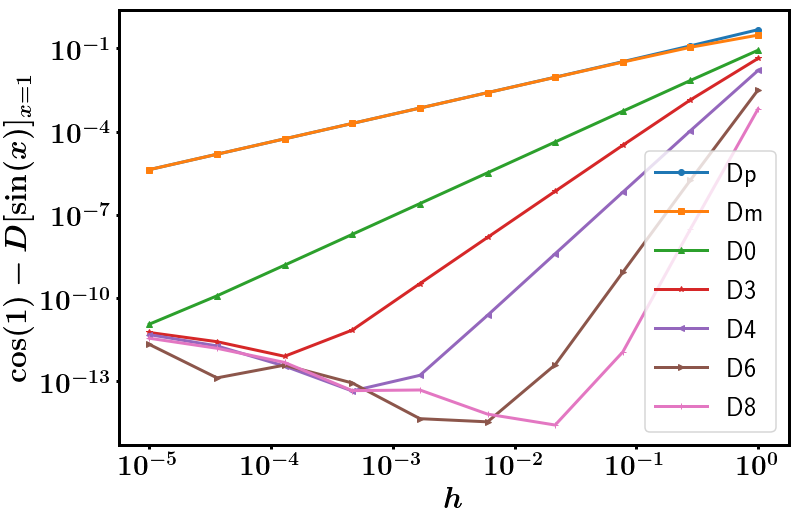

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$h$')
ax.set_ylabel(r'$\cos(1) - D[\sin(x)]_{x=1}$')
ax.plot(df.h, df.Dp, '-o', label='Dp')
ax.plot(df.h, df.Dm, '-s', label='Dm')
ax.plot(df.h, df.D0, '-^', label='D0')
ax.plot(df.h, df.D3, '-*', label='D3')
ax.plot(df.h, df.D4, '-<', label='D4')
ax.plot(df.h, df.D6, '->', label='D6')
ax.plot(df.h, df.D8, '-+', label='D8')
ax.legend()

plt.show()